In [2]:
!pip install pandas

In [44]:
!pip install numpy seaborn matplotlib

In [202]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#import dataset 
df = pd.read_csv(r'C:\Users\Hoang\Data analysis\Titanic - Machine Learning from Disaster\train.csv')

# first 5 rows
print(f"First 5 rows are: \n {df.head()}")

First 5 rows are: 
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500

OVERVIEW OF DATASET
📌 Check info
📌 Quantity data description
📌 Unique values in each column

In [204]:
# check info
print(f'Overview of dataset:\n{df.info()}')

# numeric data description
print(f'Quantity data description:\n{df.describe()}')

# unique values of each column
print(f'Unique values:\n{df.nunique()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Overview of dataset:
None
Quantity data description:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699

CHECK MISSING AND DUPLICATED VALUES

In [206]:
#count missing value from columns
print(f"Missing value: \n {df.isnull().sum()}")

#because many of the numbers of cabin and age values missing, we fill them with "Unknow" 
df["Cabin"] = df["Cabin"].fillna("Unknow")

#fill missing values in column"Age" with medium value
df["Age"] = df["Age"].fillna(df["Age"].median())

#filling missing values in column Embark with mode value
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

#count duplicate values 
print(f"Duplicated values : {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)

#check missing values after fill
print(f"After filling all missing value: \n{df.isnull().sum()}")
print(f"Describe of numeric data:\n{df.describe()}")
print(df.nunique())

Missing value: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Duplicated values : 0
After filling all missing value: 
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
Describe of numeric data:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0

EDIT COLUMNS AND DATA
📌 DIVIDE FIRST NAME, LASTNAME, REMOVE Mr.,Miss.,..., extract other names to different column
📌 Change survived column to yes or no
📌 Divide age group into children, young,adult,senior
📌 Round the fare

In [208]:
# DIVIDE FIRST NAME, LASTNAME, REMOVE Mr.,Miss.,..., extract other names to different column

# convert Name column to string
df["Name"] = df["Name"].astype(str)

# split Last name
df[["Last Name","First Name"]] = df["Name"].str.split(",",expand = True)

# remove Mr.,Miss.,...
df["First Name"] = df["First Name"].str.replace(r"(\w+\.)","",regex = True)

# extract other name and save to new column
df["Known As"] = df["First Name"].str.extract(r'[\w.]+\s*[\(\"]([\w.\s]+)[\)\"]$')
df["First Name"] = df["First Name"].str.replace(r'[\(\"]([\w.\s]+)[\)\"]$',"",regex=True)
df["Known As"] = df["Known As"].fillna("Unknow").astype("string")

# change survived column to yes or no
df["Survived"] = df["Survived"].apply(lambda x: "Yes" if x ==1 else "No")

# divide age group
df["Age group"] = df["Age"].apply(lambda x: 
                                  "children" if x<=14 else
                                  "young" if x<=24 else
                                  "aldult" if x<=64 else
                                  "senior")

# convert object columns to string
obj_columns = df[["Survived","Sex","Cabin","Embarked","Age group","Last Name","First Name"]].copy()
for column in obj_columns:
    df[column] = df[column].astype("string")

# Round the fare
df["Fare"] = df["Fare"].round(2)
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name,First Name,Known As,Age group
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,Unknow,S,Braund,Owen Harris,Unknow,young
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C,Cumings,John Bradley,Florence Briggs Thayer,aldult
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,Unknow,S,Heikkinen,Laina,Unknow,aldult
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S,Futrelle,Jacques Heath,Lily May Peel,aldult
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,Unknow,S,Allen,William Henry,Unknow,aldult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,No,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,Unknow,S,Montvila,Juozas,Unknow,aldult
887,888,Yes,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,Graham,Margaret Edith,Unknow,young
888,889,No,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.45,Unknow,S,Johnston,Catherine Helen,Carrie,aldult
889,890,Yes,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,Behr,Karl Howell,Unknow,aldult


EDA
💡 Analysize the price by using histogram
💡 How the average fare diffirent class pay
💡 Location of difference class(Embarked)
💡 How many people survived( between gender, age groups, class)

In [226]:
# How average fare different class pay
print(df.groupby("Pclass").agg({'Fare':['mean','max','min','median']}))

# which port has most people
print(df.groupby(['Pclass','Embarked'])['PassengerId'].count().unstack('Embarked'))

a = df.groupby(['Age group','Sex','Survived'])['PassengerId'].count().unstack('Sex')
pd.pivot_table(df, 
               values=['PassengerId'], 
               index=['Age group'], 
               columns=['Survived','Sex','Pclass'], 
               aggfunc=['count'],fill_value=0)
               

             Fare                    
             mean     max  min median
Pclass                               
1       84.154630  512.33  0.0  60.29
2       20.662174   73.50  0.0  14.25
3       13.675866   69.55  0.0   8.05
Embarked   C   Q    S
Pclass               
1         85   2  129
2         17   3  164
3         66  72  353


count                                                
          PassengerId                                                
Survived           No                         Yes                    
Sex            female        male          female         male       
Pclass              1  2   3    1   2    3      1   2   3    1  2   3
Age group                                                            
aldult              2  5  42   65  68  198     65  44  39   39  7  29
children            1  0  13    0   0   18      1  10  13    3  9   9
senior              0  0   0    5   2    3      0   0   0    1  0   0
young               0  1  17    7  21   81     25  16  20    2  1   9

posx and posy should be finite values
posx and posy should be finite values


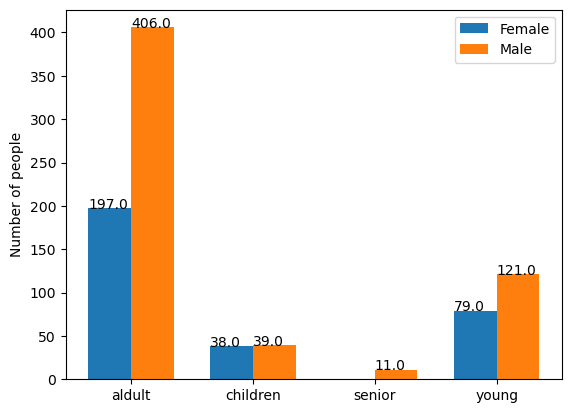

KeyError: 'Yes'

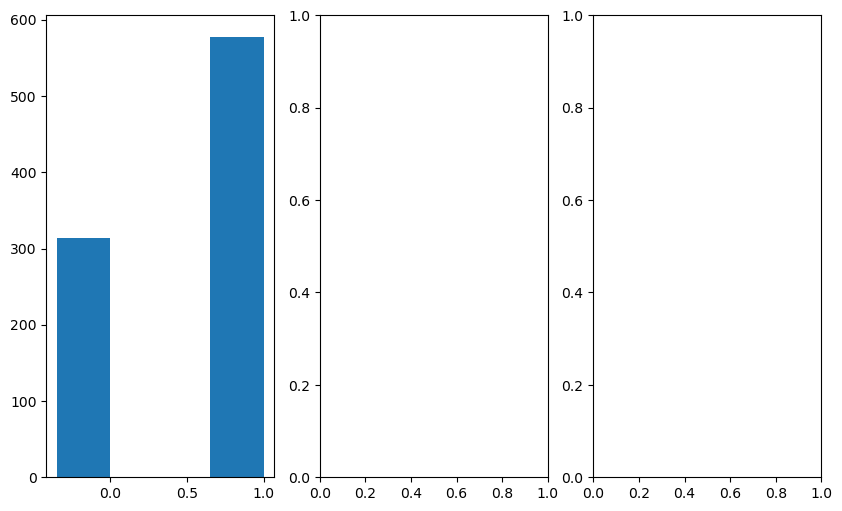

In [176]:
# CREATE A BAR CHART TO SHOW DIFFERENCE BETWEEN SEX OF PASSENGER



# Group by Age group, sex and count, then unstack Sex column
a = df.groupby(["Age group","Sex"])["PassengerId"].count().unstack()

# plot bar chart

plt.figure()
x = np.arange(len(a.index)) # x axis is an array [0,1,2,3]
width = 0.35 # bar width 
bar1 = plt.bar(x-width/2,a["female"],width,label ="Female") 
bar2 = plt.bar(x+width/2,a["male"],width,label = "Male")
plt.xticks(x,a.index) # pass x axis labels to ["Age group"]

# display number on top of bars
for a in bar1:
    plt.text(a.get_xy()[0],a.get_height(),a.get_height())
for b in bar2:
    plt.text(b.get_xy()[0],b.get_height(),b.get_height())
plt.ylabel("Number of people")
plt.legend()
plt.show()

fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize =(10,6))
ax1 = plt.subplot(1,3,1)
a = df.groupby(["Sex","Survived"])["PassengerId"].count().unstack("Survived")
x = np.arange(len(a.index))
width = 0.35
bar1 = plt.bar(x-width/2,a["No"],width,label = "No")
bar1 = plt.bar(x+width/2,a["Yes"],width,label = "Yes")
plt.xticks(x,a.index)
plt.legend()
plt.title("Survived between Gender")
plt.xlabel("Gender")
plt.ylabel("Number of survivers")
plt.grid(axis="y")
plt.show()

In [194]:
a = [1,1,0,0,1,1]
df = pd.DataFrame(a)
df[0] = df[0].apply(lambda x: 'Yes' if x == 1 else 'No')
df[0]= df[0].astype('string')
df

,0
0,Yes
1,Yes
2,No
3,No
4,Yes
5,Yes
